In [89]:
# importing libraies
import pandas as pd #pandas: For data manipulation and analysis.
import numpy as np #For numerical operations.
import seaborn as sns # For statistical data visualization
import matplotlib.pyplot as plt # For creating static plots.
import plotly.express as px #For interactive data visualizations such as zooming, hovering, and clicking to get more details.

In [90]:
# load datasets
data = pd.read_csv("C:\\Users\\OMARY RAMADHAN\\Desktop\\MGODI CHECK\\weather.csv")

In [91]:
# inspecting train data 
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [92]:
data.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


In [93]:
# observing the shape of the data 
print("data shape:",data.shape)

data shape: (1461, 6)


In [94]:
# showing list of columnsof data
list(data.columns)

['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather']

In [95]:
# information about data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [96]:
# checking null|empty value if is available
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [97]:
data.isnull().sum().sum()

0

In [98]:
# convert data type into datetime
# This line converts the date column in the DataFrame df to datetime format.
# The pd.to_datetime() function takes a sequence (like a list or a pandas Series) 
# of date strings and converts it into datetime objects.
data['date'] = pd.to_datetime(data['date']) 

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [100]:
 #This line calculates the number of unique values in each
#column of the DataFrame df
data.nunique()

date             1461
precipitation     111
temp_max           67
temp_min           55
wind               79
weather             5
dtype: int64

In [101]:
#data visuloization:this one is for observing how data appear on wheather collumn
data["weather"].value_counts()


weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

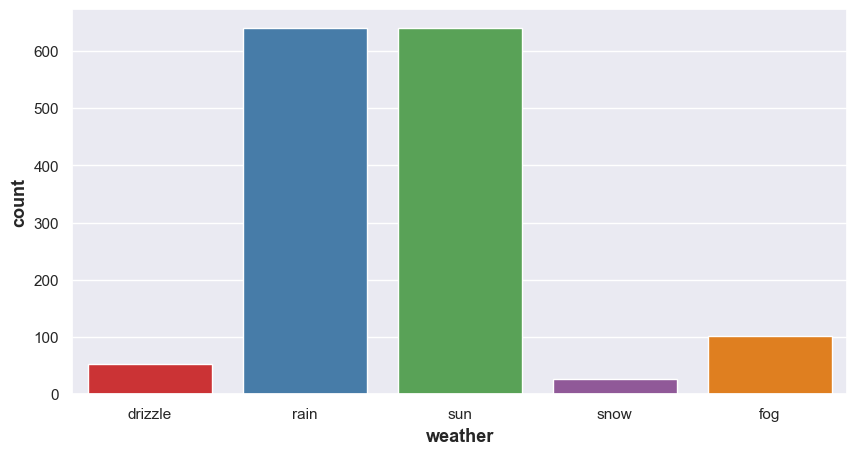

In [103]:
plt.figure(figsize = (10,5)) #initialize the new figure, to 10 inches width and 5 inches height
sns.set_theme() #apply the default them
sns.countplot(x='weather',data = data,palette="Set1" ,hue = 'weather')
#sns count.plot this funtion create a count plot
plt.xlabel( 'weather',fontweight='bold',size =13)
plt.ylabel('count',fontweight='bold',size =13)
plt.show()

In [ ]:
import plotly.express as px #for creating line plot/graphs

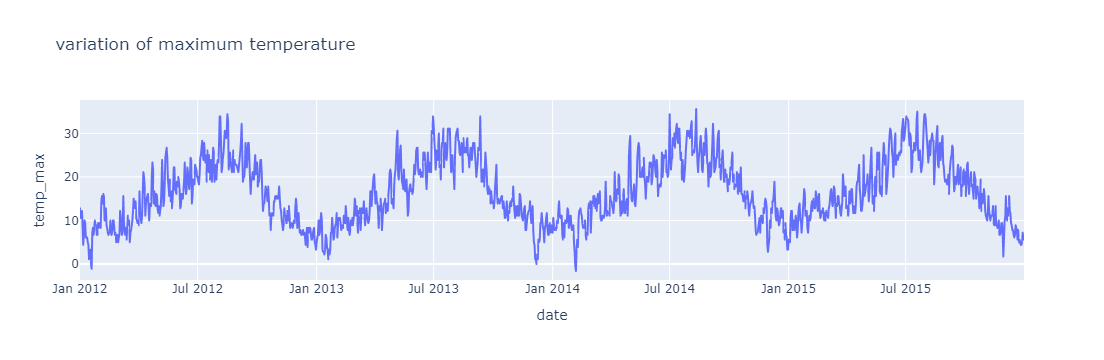

In [105]:
# maxmum temperature: data_frame = 'data' used to specifie data to be plotted
px.line(data_frame =data,x ='date',y='temp_max',title='variation of maximum temperature')

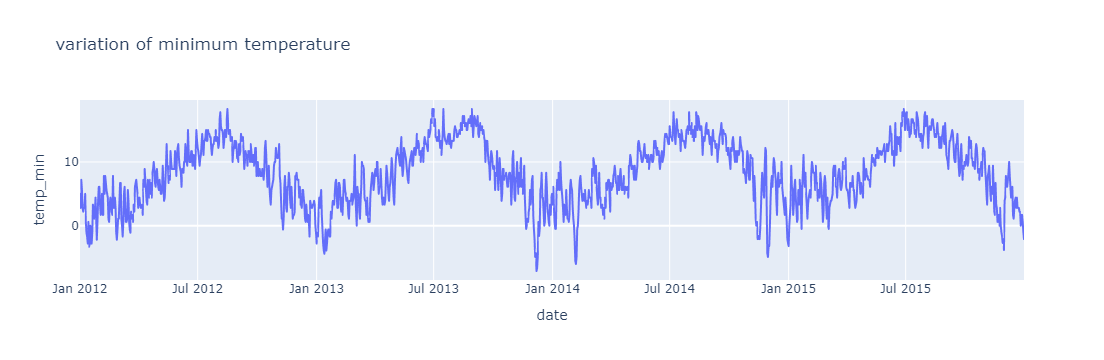

In [107]:
px.line(data_frame = data, x='date',y='temp_min',title ='variation of minimum temperature')

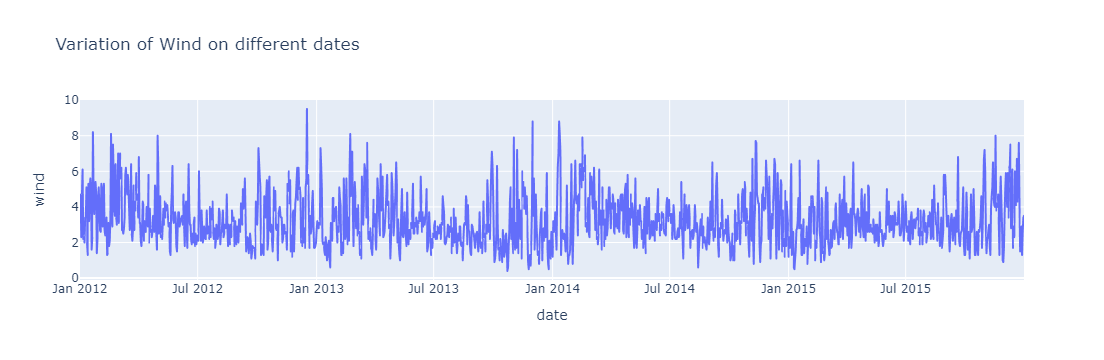

In [108]:
px.line(data_frame = data,
       x = 'date',
       y = 'wind', 
       title = 'Variation of Wind on different dates')

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1400x800 with 0 Axes>

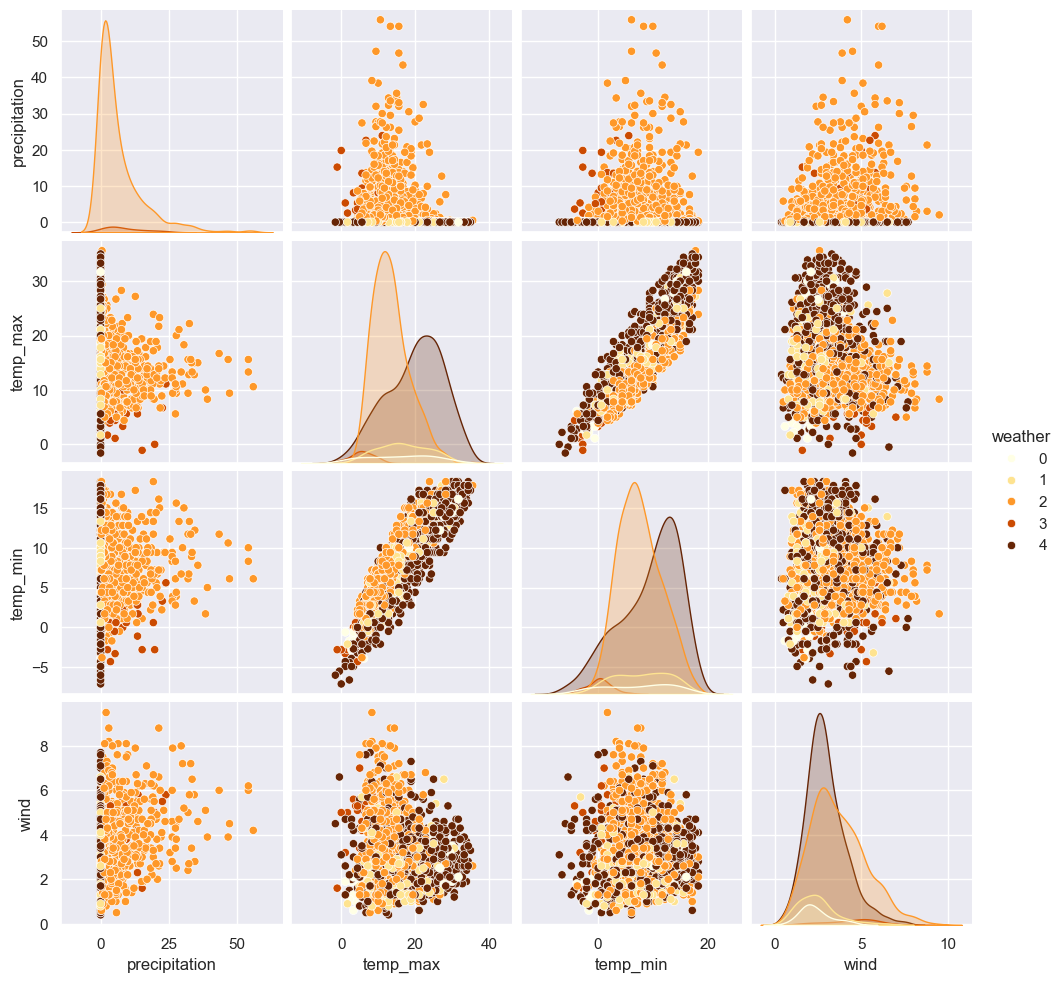

In [109]:
# pair plot analysis

plt.figure(figsize = (14,8))
sns.pairplot(data.drop('date',axis = 1),hue = 'weather',palette = "YlOrBr")
plt.show

<Figure size 1000x500 with 0 Axes>

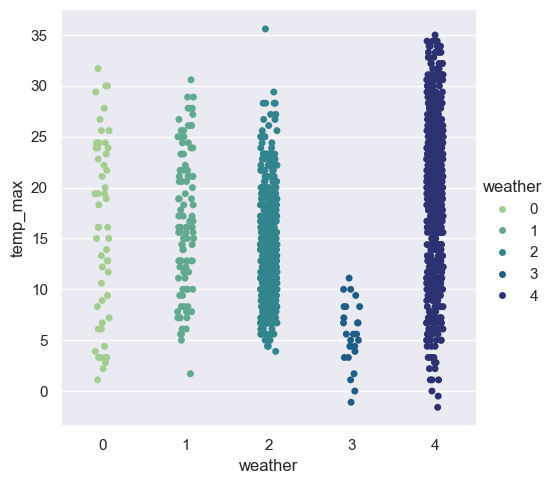

In [110]:
plt.figure(figsize=(10,5))
sns.catplot(x="weather",y = 'temp_max',data = data, palette="crest" ,hue = "weather")
plt.show()

<Figure size 1000x500 with 0 Axes>

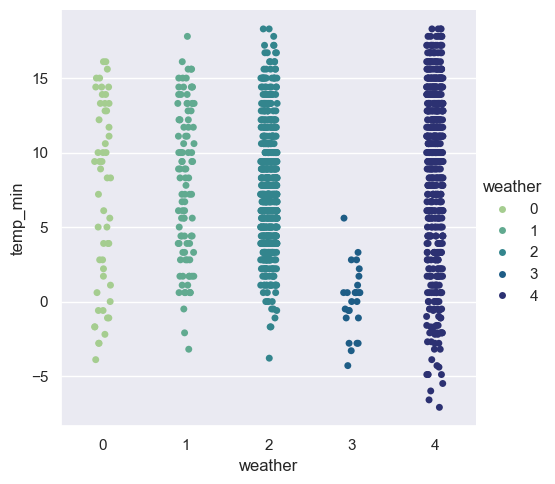

In [111]:
plt.figure(figsize=(10,5))
sns.catplot(x="weather",y = 'temp_min',data = data, palette="crest" ,hue = "weather")
plt.show()

<Figure size 1000x500 with 0 Axes>

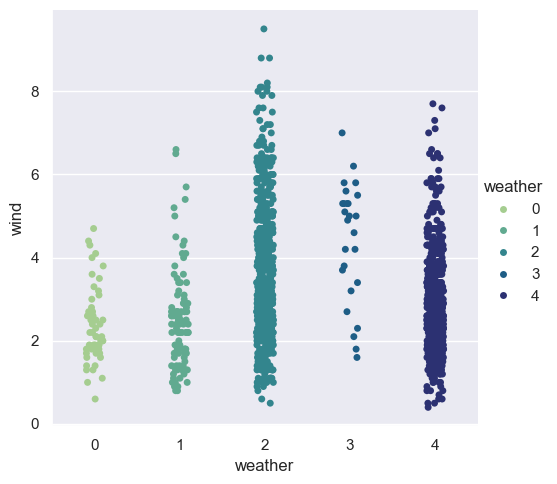

In [112]:
plt.figure(figsize=(10,5))
sns.catplot(x="weather",y = 'wind',data = data, palette="crest" ,hue = "weather")
plt.show()

<Figure size 1000x500 with 0 Axes>

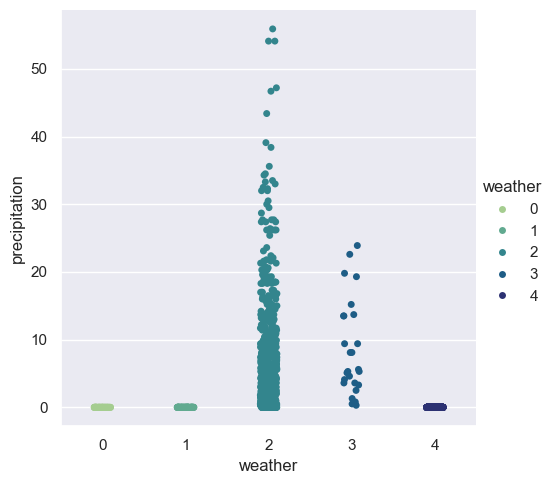

In [113]:
plt.figure(figsize=(10,5))
sns.catplot(x="weather",y = 'precipitation',data = data, palette="crest" ,hue = "weather")
plt.show()

###DATA PROCESSING

In [106]:
def LABEL_ENCODING(c1): #define the functio with parameter c1 that will be used for passing name of column we want to
    from sklearn import preprocessing #is the module that provide utilities for data processing and futere engineering
    label_encoder = preprocessing.LabelEncoder() #assigning LabelEncoder to viriable label_encoder, LabelEncoder() used for converting string to intergers
    data[c1] = label_encoder.fit_transform(data[c1]) #converting all data in column c1 into interger
    data[c1].unique()  #get unique value from the encoded column c1 in the data DataFram
LABEL_ENCODING('weather') #calling function LABEL_ENCODING for coding that weather column

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(1)
memory usage: 62.9 KB


In [116]:
data = data.drop('date',axis = 1)

In [117]:
x = data.drop('weather',axis=1)
y = data['weather']

In [118]:
from sklearn.model_selection import train_test_split #import fx from sklearn library for train and test data spliting
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0) #x is the input feature (independent), y is output dependent
                                                                                            #specifies proportion of test data is 30% and remaining is
                                                                                            #traing, random_state = 0 ensure reproducibity(get the same 
                                                                                            #split every time when you run your code

In [119]:
from sklearn.preprocessing import StandardScaler # class StandardScaler from module preprocessing is for standardizing data to (0-1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

###Logistic Regression

In [121]:
from sklearn.linear_model import LogisticRegression 
 # LogisticRegression is the method of binary classification, used for predicting the probability of binary outcome
log_classifier =  LogisticRegression(random_state = 0)
log_classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [122]:
y_pred_log = log_classifier.predict(X_test) #making evolution after prediction, and predicted result stores as y_pred

In [123]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_log)

acccuracy score:0.7767653758542141


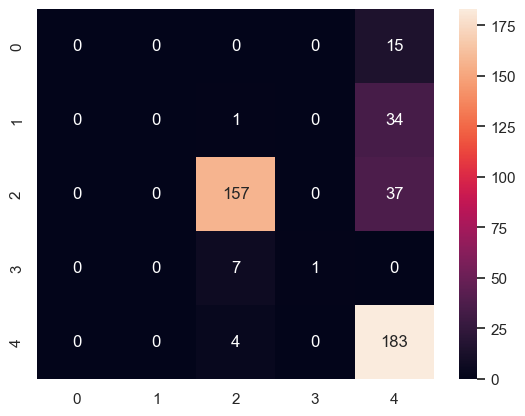

In [124]:
sns.heatmap(cm,annot = True, fmt = "0.3g") #powerful data visualization library based on Matplotlib, cm A confusion matrix is a table used to evaluate the performance of a classification model
acc1 = accuracy_score(y_test, y_pred_log) #It calculates the accuracy of the predictions, which is the ratio of correctly predicted instances to the total instances.
print(f"acccuracy score:{acc1}")  
plt.show()

In [126]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [130]:
y_pred = classifier.predict(X_test)

Accuracy Score 0.7699316628701595


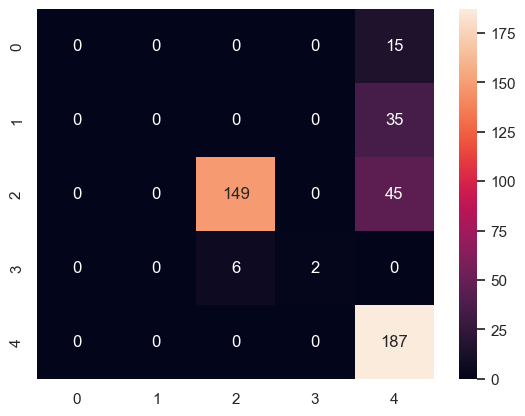

In [129]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = '0.3g')
print("Accuracy Score" ,accuracy_score(y_test, y_pred))

In [132]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [134]:
y_pred = classifier.predict(X_test)

Accuracy score : 0.4419134396355353


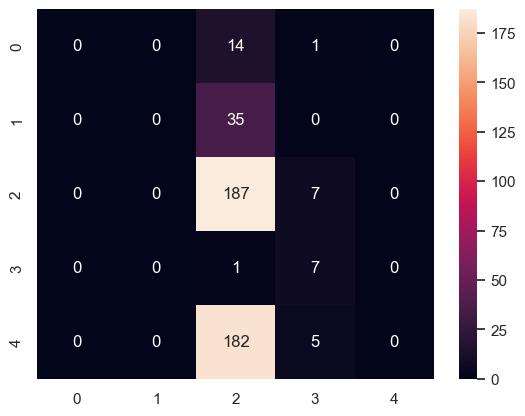

In [135]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = '.3g')
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy score : {acc}")

In [ ]:
import pickle
pickle.dump(log_classifier,open('model.pkl','wb'))